In [ ]:
#Libraries
import matplotlib.pyplot as plt

import tensorflow as tf

#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




# Data collection

In [2]:
# Load dataset from tensorflow !
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Normalize pixel values between 0 and 1 (recommanded !)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class labels for reference
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


# Exploratory Data Analysis (EDA)

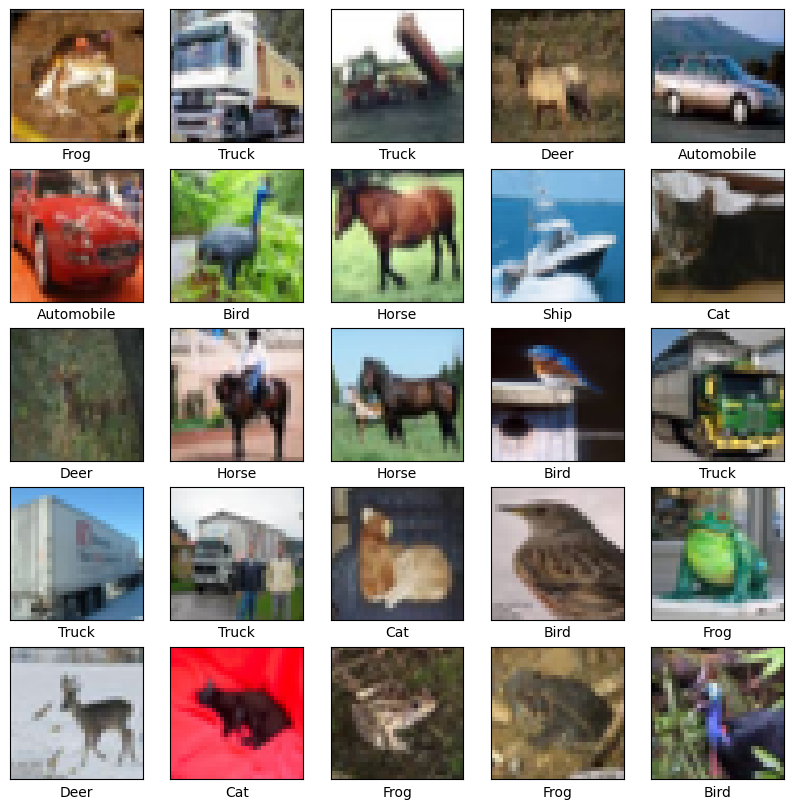

In [ ]:
# Visualize the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


# Model

##CNN

In [4]:
#Build the Model
model = models.Sequential([
    #Bloc 1
    layers.Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)),   #Covolutionnel layers
    layers.BatchNormalization(),  #Batch Normalization
    layers.Conv2D(64, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),  #Max pooling
    layers.BatchNormalization(),  #Batch Normalization
    layers.Dropout(0.25),       #Drop out

    #Bloc 2
    layers.Conv2D(128, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),       #Drop out

    #Bloc 3
    layers.Conv2D(256, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

     #Bloc 4
    layers.Conv2D(256, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu',padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    #Le classifieur
    layers.Flatten(), #Fully connected layer
    layers.Dense(512, activation='relu'),
    #layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),

])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 256)           │           1,0

 Total params: 2,863,946 (10.93 MB)

 Trainable params: 2,859,722 (10.91 MB)

 Non-trainable params: 4,224 (16.50 KB)

In [ ]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #chosed for having 10 classes
              metrics=['accuracy'])


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.001,          # Reduce learning rate by a factor of 0.5
    patience=3,          # Wait for 3 epochs before reducing learning rate
    min_lr=1e-6          # Set the minimum learning rate
)


In [ ]:
#Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,           # Maximum number of epochs
    batch_size=32,
    # callbacks=[early_stopping, reduce_lr]  # Add callbacks
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 20ms/step - accuracy: 0.4208 - loss: 1.7062 - val_accuracy: 0.6383 - val_loss: 1.0436
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 13ms/step - accuracy: 0.6990 - loss: 0.8660 - val_accuracy: 0.7409 - val_loss: 0.7447
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7650 - loss: 0.6716 - val_accuracy: 0.7123 - val_loss: 0.8802
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8046 - loss: 0.5596 - val_accuracy: 0.7905 - val_loss: 0.6195
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8430 - loss: 0.4544 - val_accuracy: 0.8036 - val_loss: 0.5885
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8667 - loss: 0.3894 - val_accuracy: 0.8382 - val_loss: 0.5078
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8911 - loss: 0.3178 - val_accuracy: 0.8391 - val_loss: 0.5085
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9053 - loss: 0.27

In [ ]:
# model.save("cnn.h5")

# Evaluation

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 1s - 4ms/step - accuracy: 0.8451 - loss: 0.5418
Test accuracy: 0.8450999855995178


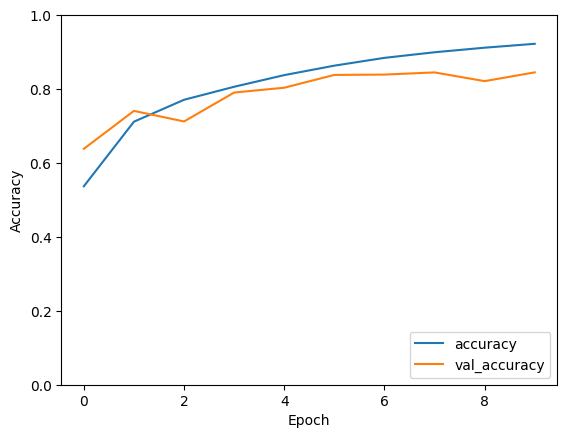

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical


# Conversion des étiquettes pour AUC (une seule colonne pour roc_auc_score)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Prédictions du modèle
y_pred_probs = model.predict(x_test)  # Probabilités prédites
y_pred = np.argmax(y_pred_probs, axis=1)  # Classes prédites

# Calcul du rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1000
           1       0.91      0.94      0.92      1000
           2       0.80      0.79      0.79      1000
           3       0.73      0.71      0.72      1000
           4       0.84      0.84      0.84      1000
           5       0.75      0.79      0.77      1000
           6       0.91      0.84      0.87      1000
           7       0.86      0.91      0.88      1000
           8       0.85      0.95      0.90      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



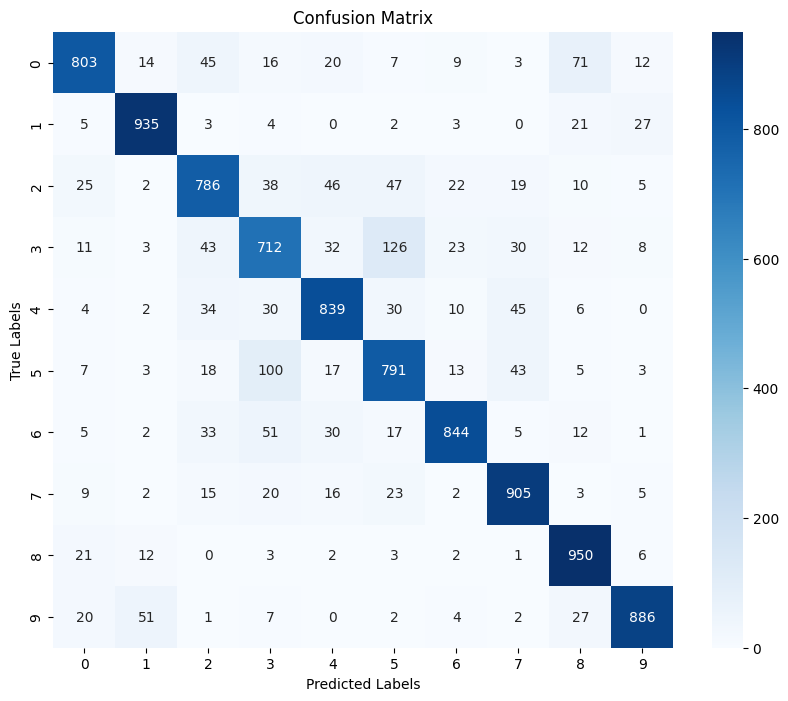

In [14]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


AUC Scores per Class:
Class 0: 0.9883
Class 1: 0.9964
Class 2: 0.9757
Class 3: 0.9660
Class 4: 0.9853
Class 5: 0.9759
Class 6: 0.9912
Class 7: 0.9922
Class 8: 0.9956
Class 9: 0.9947


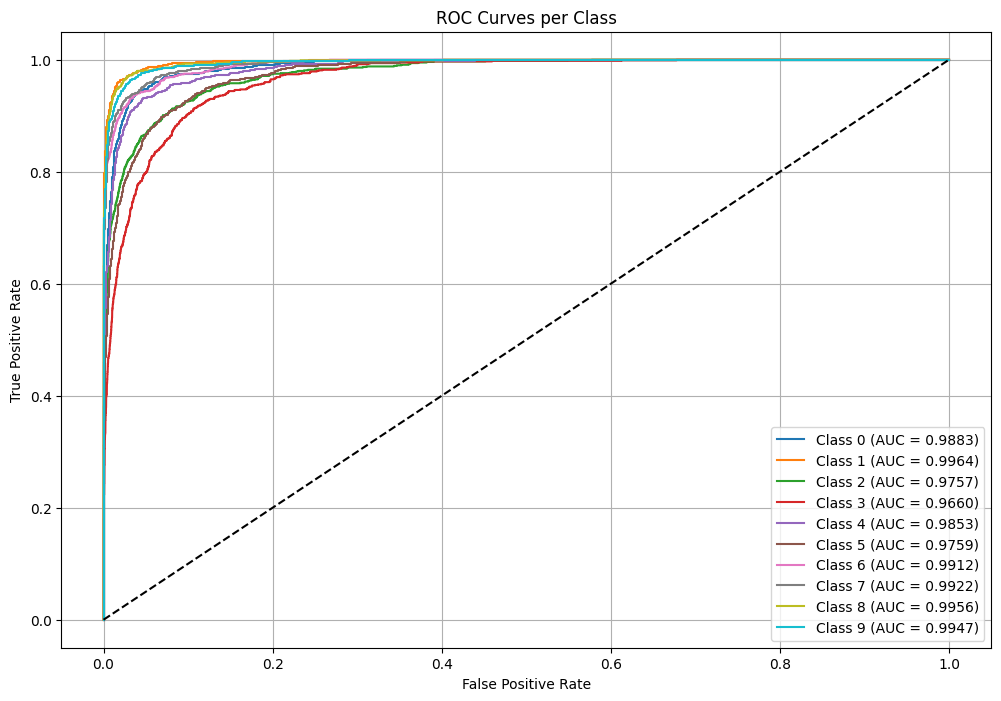

In [16]:
# AUC par classe
auc_scores = {}
for i in range(10):
    auc = roc_auc_score(y_test_one_hot[:, i], y_pred_probs[:, i])
    auc_scores[f"Class {i}"] = auc

print("\nAUC Scores per Class:")
for label, score in auc_scores.items():
    print(f"{label}: {score:.4f}")

# Courbes ROC
plt.figure(figsize=(12, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_scores[f'Class {i}']:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Courbe de référence
plt.title("ROC Curves per Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
